In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
from sklearn.datasets import make_blobs

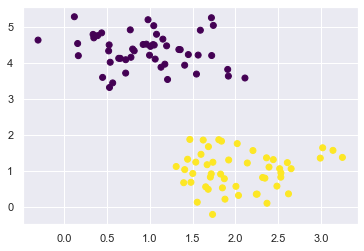

In [2]:
X,y = make_blobs(n_samples=100,n_features = 2,centers=2, cluster_std=0.5,random_state=0)

plt.scatter(X[:,0],X[:,1],c = y,cmap='viridis')

In [7]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        
    def __linear_combination(self,X):
        return X@self.w
    
    def __sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def __activation(self,X):
        return self.__sigmoid(self.__linear_combination(X))
    
    def __loss(self,X,y):
        y_pred = self.__activation(X)
        
        return -np.sum(y*np.log(y_pred) + (1-y)*np.log(1 - y_pred))
    
    def predict(self,X,threshold=0.5):
        y_pred = self.__activation(X)
        
        return np.where(y_pred>=threshold,1,0)
    
    def __caclulate_gradient(self,X,y):
        y_pred = self.__activation(X)
        
        return np.transpose(X)@(y_pred - y)
    
    def fit(self,X,y,lr=0.001,epochs=1000):
        self.w = np.zeros(X.shape[-1])
        
        self.losses = []
        for _ in range(epochs):
            loss = self.__loss(X,y)
            self.losses.append(loss)
            
            d_w = self.__caclulate_gradient(X,y)
            self.w -= lr*d_w
            
        return plt.plot(self.losses)
            

In [8]:
logreg = LogisticRegression()

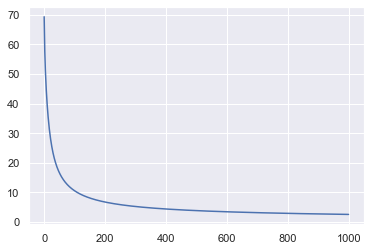

In [9]:
logreg.fit(X,y)

In [10]:
logreg.predict(X)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [11]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])